### traj_1080-1110_0005240745-32MW080_1

** packages **

In [1]:
from ctd2xray import cchdo
from mpl_toolkits.basemap import Basemap
from pymongo import MongoClient
import gsw
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xarray as xr
from Circles.circles import circle

In [22]:
%matplotlib inline

** traj_1080-1110_0005240745 **

Dec. 18, 1995 - Jan 16, 1996

In [6]:
rcs_eddies = MongoClient().eddies.rcs_eddies

In [7]:
eddy_code = 'traj_1080-1110_0005240745'

In [8]:
eddy_rclv = rcs_eddies.find_one({'_id': eddy_code})

In [9]:
eddy_traj = eddy_rclv['features'][2]['geometry']['coordinates']

In [10]:
obs_num = len(eddy_traj)

In [11]:
lon_eddy = np.zeros(obs_num)
lat_eddy = np.zeros(obs_num)

In [12]:
for i in range(obs_num):
    lon_eddy[i] = eddy_traj[i][0]
    lat_eddy[i] = eddy_traj[i][1]

** 32MW080_1 **

May 3, 2007 - May 7, 2007

In [15]:
cchdo_ctd = MongoClient().eddies.cchdo_ctd

In [16]:
expo_code = '32MW080_1'

In [17]:
cas_num = cchdo_ctd.find({'expocode': expo_code}).count()

In [18]:
lon_expo = np.zeros(cas_num)
lat_expo = np.zeros(cas_num)

In [19]:
# longitude range setting
# from 0 to 360
def format(longitude):
    if longitude > 0:
        longitude = longitude
    else:
        longitude = longitude + 360
    return longitude

In [20]:
i = 0
for expo in cchdo_ctd.find({'expocode': expo_code}).sort('time', 1):
    lon_expo[i] = format(expo['location']['coordinates'][0])
    lat_expo[i] = expo['location']['coordinates'][1]
    i = i+1

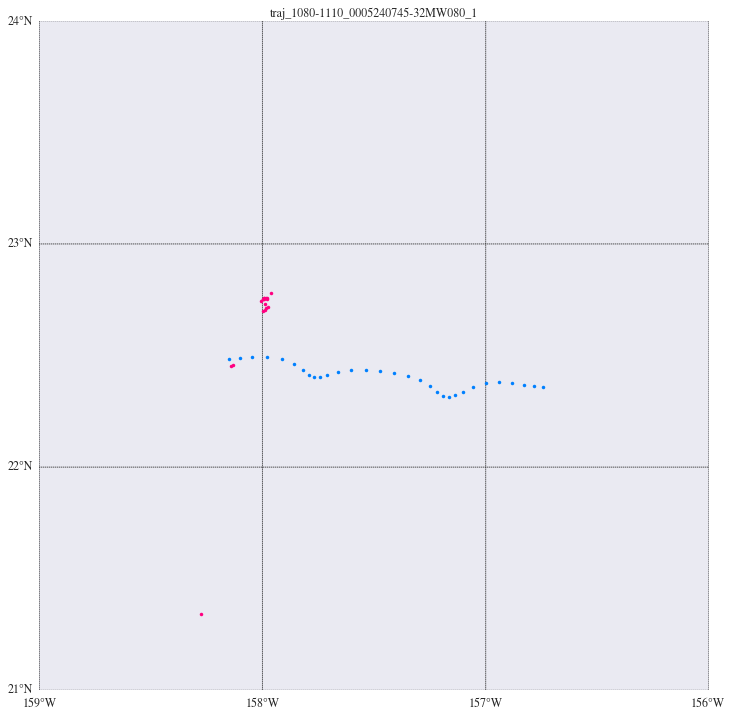

In [23]:
sns.set(color_codes=True)
plt.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['font.family'] = "STIX"
my_map = Basemap(projection='cyl', llcrnrlat=21, urcrnrlat=24,\
                 llcrnrlon=201, urcrnrlon=204, resolution='c')
my_map.fillcontinents()
parallels = np.arange(-90, 90, 1)
my_map.drawparallels(parallels, labels=[True,False,False,True])
meridians = np.arange(0, 360, 1)
my_map.drawmeridians(meridians, labels=[True,False,False,True])
x_eddy, y_eddy = my_map(lon_eddy, lat_eddy)
x_expo, y_expo = my_map(lon_expo, lat_expo)
my_map.plot(x_eddy, y_eddy, '.', color='#0080ff')
my_map.plot(x_expo, y_expo, '.', color='#ff0080')
plt.title(eddy_code + '-' + expo_code)
#plt.savefig('figures/figure-1/' + eddy_code + '-' + expo_code + '.jpeg')
plt.show()

** temperature-salinity **

In [24]:
STA = 62
CAS = 1

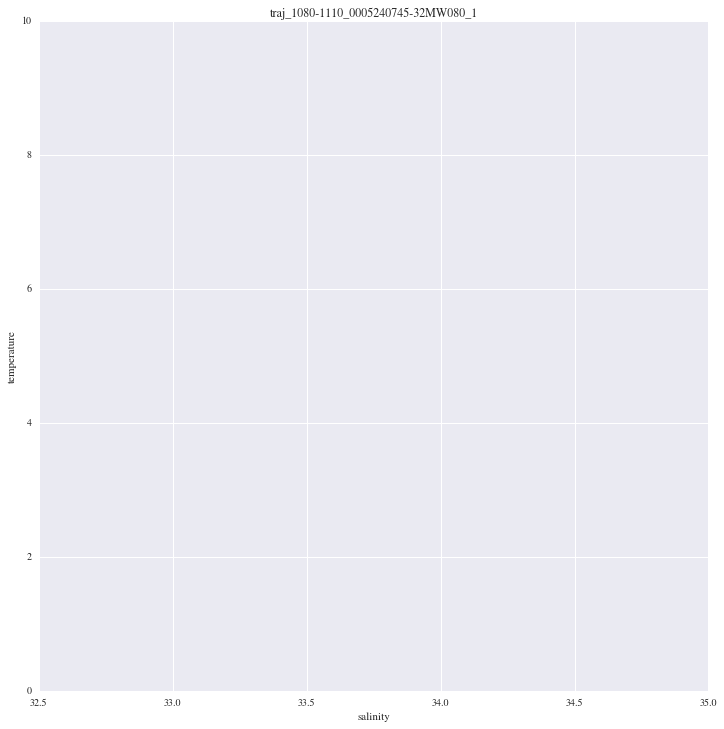

In [25]:
sns.set(color_codes=True)
mpl.rcParams['font.family'] = "STIX"
mpl.rcParams['figure.figsize'] = (12, 12)
for expo in cchdo_ctd.find({'expocode': expo_code}).sort('time', 1):
    ds = xr.open_dataset(expo['path'])
    woce = str(ds.WOCE_ID)
    time = ds.time.values[0]
    lon = ds.longitude.values[0]
    lat = ds.latitude.values[0]
    p = ds.pressure.values
    t = ds.temperature.values
    s = ds.salinity.values
    o = ds.oxygen.values
    sa = gsw.SA_from_SP(s, p, lon, lat)
    ct = gsw.CT_from_t(sa, t, p)
    station = int(filter(str.isdigit, str(ds.STATION_NUMBER)))
    cast = int(filter(str.isdigit, str(ds.CAST_NUMBER)))
    if (station == STA and cast == CAS):
        DAT = time
        LAT = lat
        LON = lon
        plt.plot(sa, ct, color='#ff0000', zorder=2)
    elif (STA-6) < station < STA:
        plt.plot(sa, ct, color='#cccccc', zorder=1)
    elif STA < station < (STA+6):
        plt.plot(sa, ct, color='#999999', zorder=1)
plt.xlim([32.5, 35])
plt.ylim([0, 10])
plt.title(eddy_code + '-' + expo_code)
plt.xlabel('salinity')
plt.ylabel('temperature')
plt.savefig('figures/figure-2/' + eddy_code + '-' + expo_code + '.jpeg')
plt.show()

** pressure-temperature **

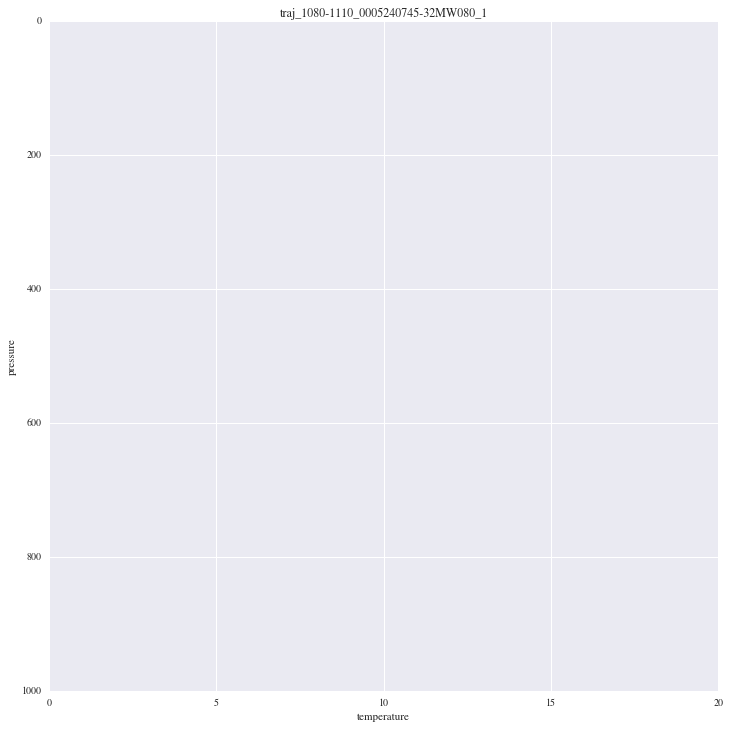

In [26]:
sns.set(color_codes=True)
plt.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['font.family'] = "STIX"
for expo in cchdo_ctd.find({'expocode': expo_code}).sort('time', 1):
    ds = xr.open_dataset(expo['path'])
    woce = str(ds.WOCE_ID)
    time = ds.time.values[0]
    lon = ds.longitude.values[0]
    lat = ds.latitude.values[0]
    p = ds.pressure.values
    t = ds.temperature.values
    s = ds.salinity.values
    o = ds.oxygen.values
    sa = gsw.SA_from_SP(s, p, lon, lat)
    ct = gsw.CT_from_t(sa, t, p)
    station = int(filter(str.isdigit, str(ds.STATION_NUMBER)))
    cast = int(filter(str.isdigit, str(ds.CAST_NUMBER)))
    if (station == STA and cast == CAS):
        LAT = lat
        plt.plot(ct, p, color='#ff0000', zorder=2)
    elif (STA-6) < station < STA:
        plt.plot(ct, p, color='#cccccc', zorder=1)
    elif STA < station < (STA+6):
        plt.plot(ct, p, color='#999999', zorder=1)
plt.xlim([0, 20])
plt.ylim([1000, 0])
plt.title(eddy_code + '-' + expo_code)
plt.xlabel('temperature')
plt.ylabel('pressure')
plt.savefig('figures/figure-3/' + eddy_code + '-' + expo_code + '.jpeg')
plt.show()

** pressure-salinity **

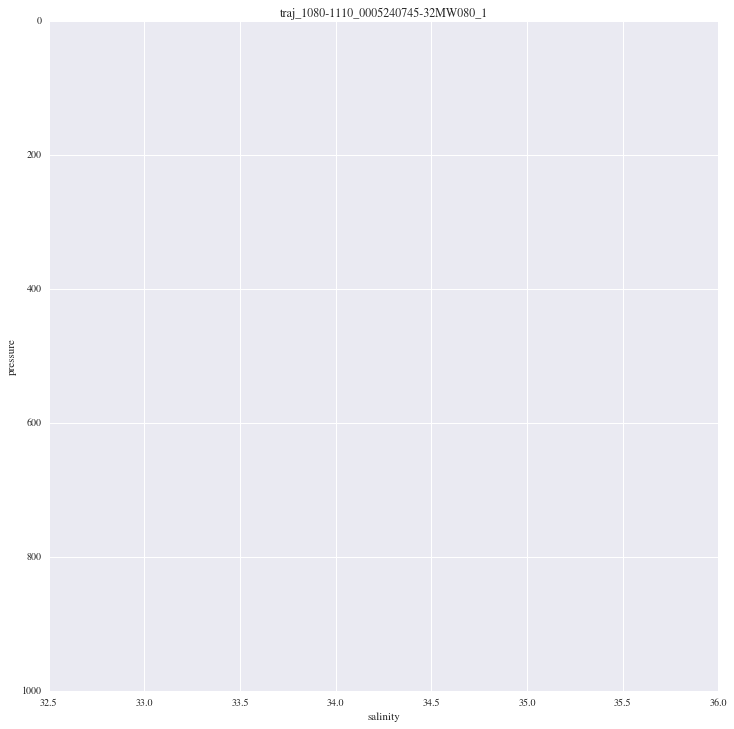

In [27]:
sns.set(color_codes=True)
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['font.family'] = "STIX"
for expo in cchdo_ctd.find({'expocode': expo_code}).sort('time', 1):
    ds = xr.open_dataset(expo['path'])
    time = ds.time.values[0]
    woce = str(ds.WOCE_ID)
    lon = ds.longitude.values[0]
    lat = ds.latitude.values[0]
    p = ds.pressure.values
    t = ds.temperature.values
    s = ds.salinity.values
    o = ds.oxygen.values
    sa = gsw.SA_from_SP(s, p, lon, lat)
    ct = gsw.CT_from_t(sa, t, p)
    station = int(filter(str.isdigit, str(ds.STATION_NUMBER)))
    cast = int(filter(str.isdigit, str(ds.CAST_NUMBER)))
    if (station == STA and cast == CAS):
        DAT = time
        LAT = lat
        plt.plot(sa, p, color='#ff0000', zorder=2)
    elif (STA-6) < station < STA:
        plt.plot(sa, p, color='#cccccc', zorder=1)
    elif STA < station < (STA+6):
        plt.plot(sa, p, color='#999999', zorder=1)
plt.xlim([32.5, 36])
plt.ylim([1000, 0])
plt.title(eddy_code + '-' + expo_code)
plt.xlabel('salinity')
plt.ylabel('pressure')
plt.savefig('figures/figure-4/' + eddy_code + '-' + expo_code + '.jpeg')
plt.show()

** pressure-oxygen **

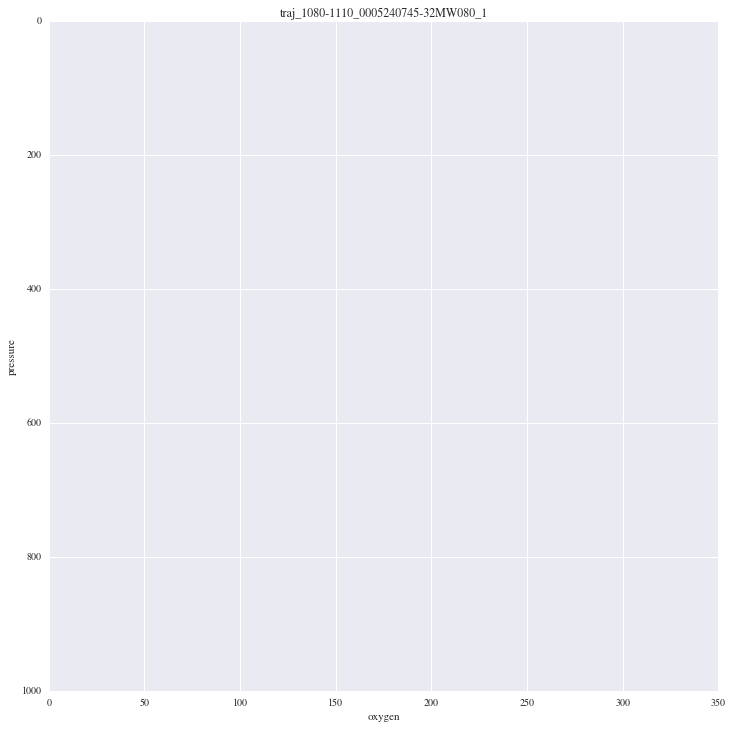

In [28]:
sns.set(color_codes=True)
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['font.family'] = "STIX"
for expo in cchdo_ctd.find({'expocode': expo_code}).sort('time', 1):
    ds = xr.open_dataset(expo['path'])
    woce = str(ds.WOCE_ID)
    time = ds.time.values[0]
    lon = ds.longitude.values[0]
    lat = ds.latitude.values[0]
    p = ds.pressure.values
    t = ds.temperature.values
    s = ds.salinity.values
    o = ds.oxygen.values
    sa = gsw.SA_from_SP(s, p, lon, lat)
    ct = gsw.CT_from_t(sa, t, p)
    station = int(filter(str.isdigit, str(ds.STATION_NUMBER)))
    cast = int(filter(str.isdigit, str(ds.CAST_NUMBER)))
    if (station == STA and cast == CAS):
        LAT = lat
        plt.plot(o, p, color='#ff0000', zorder=2)
    elif (STA-6) < station < STA:
        plt.plot(o, p, color='#cccccc', zorder=1)
    elif STA < station < (STA+6):
        plt.plot(o, p, color='#999999', zorder=1)
plt.xlim([0, 350])
plt.ylim([1000, 0])
plt.title(eddy_code + '-' + expo_code)
plt.xlabel('oxygen')
plt.ylabel('pressure')
plt.savefig('figures/figure-5/' + eddy_code + '-' + expo_code + '.jpeg')
plt.show()

In [47]:
ds

<xarray.Dataset>
Dimensions:         (latitude: 1, longitude: 1, pressure: 513, time: 1)
Coordinates:
  * time            (time) datetime64[ns] 1997-02-19T14:54:00
  * pressure        (pressure) float64 0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0 ...
  * latitude        (latitude) float64 22.46
  * longitude       (longitude) float64 -158.1
Data variables:
    pressure_QC     (pressure) int16 6 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 ...
    temperature     (pressure) float64 23.84 23.84 23.84 23.84 23.84 23.84 ...
    temperature_QC  (pressure) int16 6 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 ...
    salinity        (pressure) float64 34.93 34.93 34.93 34.93 34.93 34.93 ...
    salinity_QC     (pressure) int16 6 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 ...
    oxygen          (pressure) float64 216.3 216.3 216.3 216.4 216.5 216.7 ...
    oxygen_QC       (pressure) int16 6 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 ...
    woce_date       (time) int32 19970219
    woce_time       (time) int32 1454
    stati

** contours **

In [30]:
path_list = '/home/cz2397/data/cchdo-ctd/518_32MW080_1_nc_ctd/prs2_*'

In [31]:
pressure = np.linspace(0, 6000, num=6001, endpoint=True)

In [32]:
ds_tim = cchdo.open_cchdo_as_mfdataset(path_list, pressure)

In [35]:
ds_lat = ds_tim.swap_dims({'time': 'latitude'})

NameError: name 'LAT' is not defined

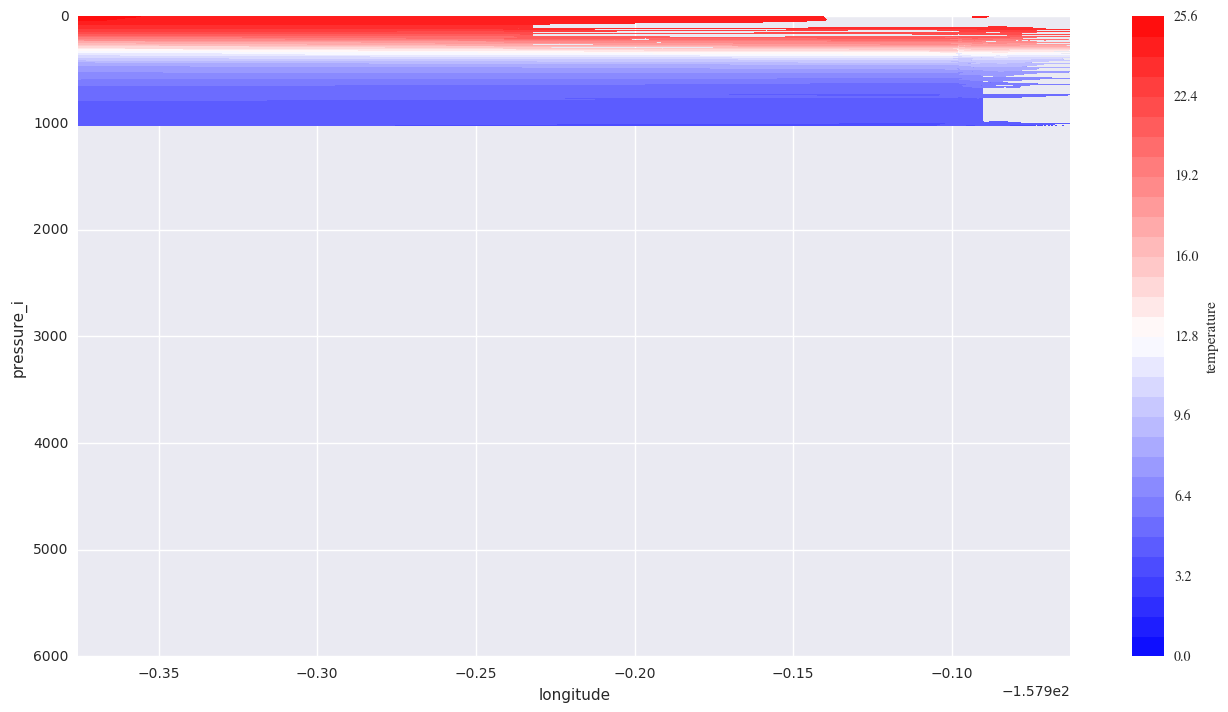

In [37]:
sns.set(color_codes=True)
fig, ax = plt.subplots(figsize=(16, 8))
mpl.rcParams['font.family'] = "STIX"
image = ds_lon.temperature_i.T.plot.contourf(yincrease=False, ax=ax, cmap='bwr',\
                                             vmin=0, vmax=25, levels=40)
image.colorbar.set_label('temperature')
plt.xlim([LAT-5, LAT+5])
plt.ylim([1000, 0])
plt.axvline(LAT, color='k')
plt.title(eddy_code + '-' + expo_code)
plt.xlabel('latitude')
plt.ylabel('pressure')
plt.savefig('figures/figure-6/' + eddy_code + '-' + expo_code + '.jpeg')
plt.show()

In [38]:
a = ds_lon.longitude.values

In [39]:
format_vec = np.vectorize(format)

In [40]:
b = format_vec(a)

In [41]:
a

array([-158.2753, -157.9983, -158.0045, -157.9733, -157.9845, -157.993 ,
       -157.9968, -157.992 , -157.9627, -157.994 , -157.9788, -157.9782,
       -157.9833, -157.9977, -157.9905, -157.9892, -158.1413, -158.1322])

In [42]:
b

array([ 201.7247,  202.0017,  201.9955,  202.0267,  202.0155,  202.007 ,
        202.0032,  202.008 ,  202.0373,  202.006 ,  202.0212,  202.0218,
        202.0167,  202.0023,  202.0095,  202.0108,  201.8587,  201.8678])

In [43]:
ds_lon.longitude.values = b

In [44]:
ds_lon.longitude.values

array([ 201.7247,  202.0017,  201.9955,  202.0267,  202.0155,  202.007 ,
        202.0032,  202.008 ,  202.0373,  202.006 ,  202.0212,  202.0218,
        202.0167,  202.0023,  202.0095,  202.0108,  201.8587,  201.8678])

NameError: name 'LON' is not defined

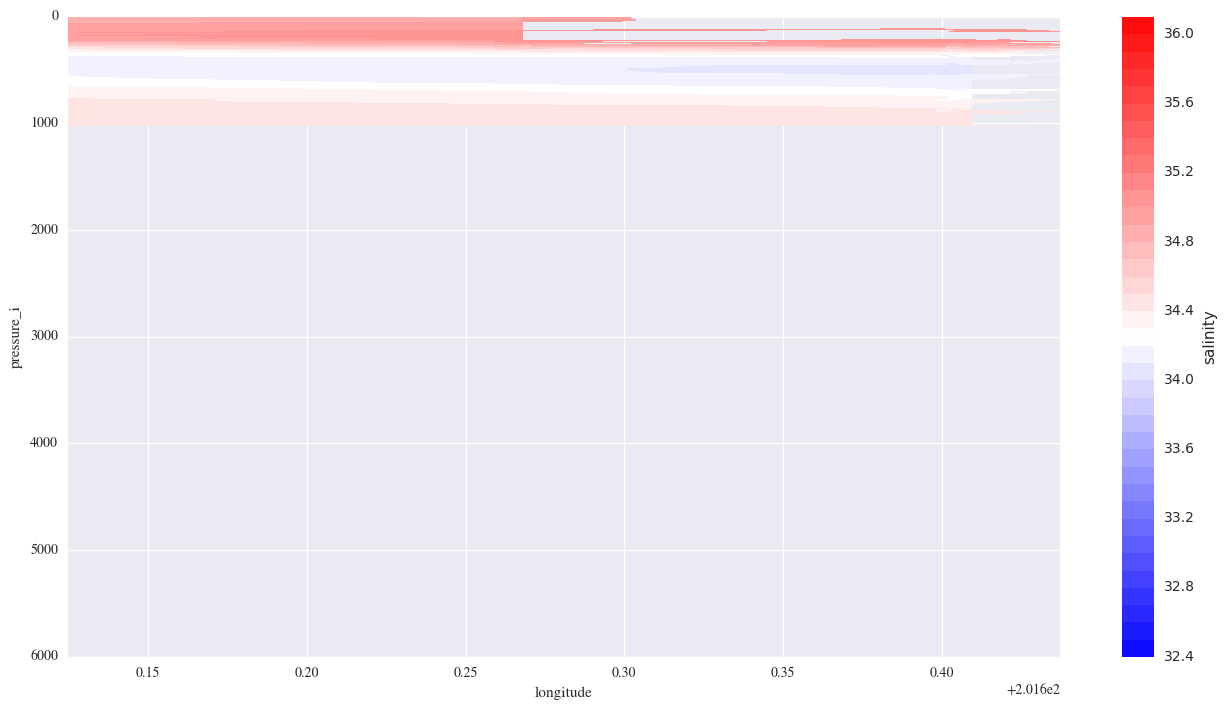

In [45]:
mpl.rcParams['font.family'] = 'STIX'
fig, ax = plt.subplots(figsize=(16, 8))
sns.set(color_codes=True)
image = ds_lon.salinity_i.T.plot.contourf(yincrease=False, ax=ax, cmap='bwr',\
                                          vmin=32.5, vmax=36, levels=40)
image.colorbar.set_label('salinity')
plt.xlim([format(LON)-5, format(LON)+5])
plt.ylim([1000, 0])
plt.axvline(format(LON), color='k')
plt.title(eddy_code + '-' + expo_code)
plt.xlabel('latitude')
plt.ylabel('pressure')
plt.savefig('figures/figure-7/' + eddy_code + '-' + expo_code + '.jpeg')
plt.show()

NameError: name 'LON' is not defined

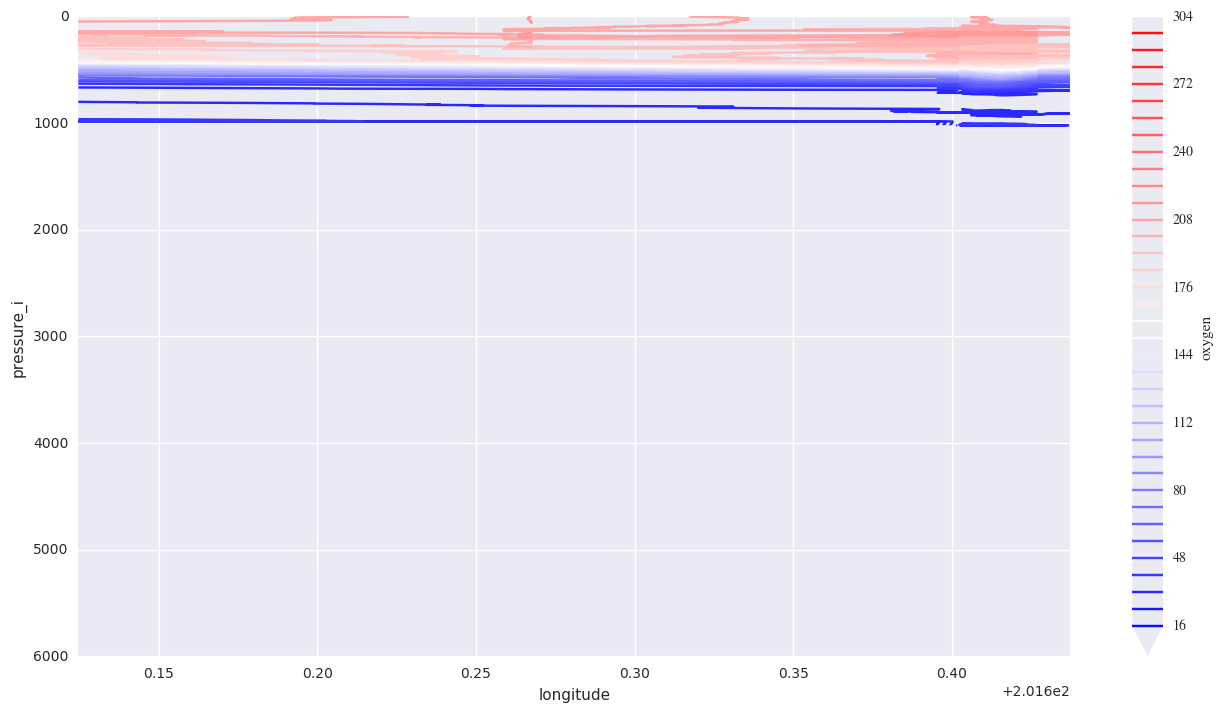

In [46]:
sns.set(color_codes=True)
fig, ax = plt.subplots(figsize=(16, 8))
mpl.rcParams['font.family'] = "STIX"
image = ds_lon.oxygen_i.T.plot.contour(yincrease=False, ax=ax, cmap='bwr',\
                                        vmin=20, vmax=300, levels=40)
image.colorbar.set_label('oxygen')
plt.xlim([format(LON)-5, format(LON)+5])
plt.ylim([1000, 0])
plt.axvline(format(LON), color='k')
plt.title(eddy_code + '-' + expo_code)
plt.xlabel('latitude')
plt.ylabel('pressure')
plt.savefig('figures/figure-8/' + eddy_code + '-' + expo_code + '.jpeg')
plt.show()